Importing functions. 

In [1]:
import numpy as np
import random as random
from numpy.random import seed
from numpy.random import rand
import scipy
#using simpleguitk for display, is not needed for computer game
import simpleguitk as simplegui
import time
#new ones
import pandas as pd
#ml methods
from xgboost import XGBRegressor
from xgboost import XGBClassifier
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import os
#skyjo game classes and functions 
from skyjo_functions4 import *
#own functions for machine learning
from ml_functions2 import *
#for plotting 
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

#for confidence intervalls
from scipy.stats import beta
#for fitting of x y data 
from scipy.optimize import curve_fit
#for splitting
from sklearn.model_selection import train_test_split
#confusing matrix
from sklearn.metrics import confusion_matrix
#for saving and loading of stranger object
import pickle
from fit_functions import *

## Analyzing gradient fit 5

This fit starts with 0 for all parameters and runs against 5 good models, including the current best one. (This best model is achieved with an combination of Monte Carlo and gradient fit.) The non standard parameters of the fitting functions are n_games:100, max_iter:50, tolerance_one:2.0, tolerance_later:0.25, max_time:16, min_win:20, power_incr:1.5

[97.6 96.4 95.  93.8 79.  79.  63.8 59.4 65.  59.6 52.4 49.8 46.  43.4
 41.6 41.6 39.6 38.2 40.4 39.6 37.  41.6]


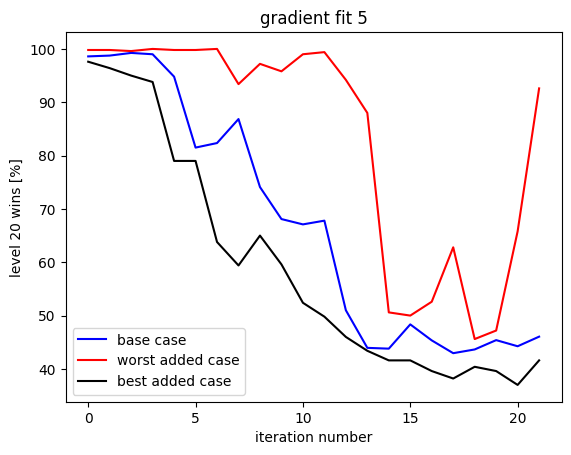

In [2]:
gradfit15=np.load('gradient_fit1_it15.npy')
myPath='/home/tobias/ml-testing/games/skyjo'
list_grad5=[f for f in os.listdir(myPath) 
    if (f.startswith('gradient4_fit2_it') )]
list_grad5.sort()

allgrad5=np.zeros((gradfit15.shape[0],gradfit15.shape[1],gradfit15.shape[2],len(list_grad5)))
range2=len(list_grad5)
for i in range(len(list_grad5)):
    allgrad5[:,:,:,i]=np.load(list_grad5[i])
plt.plot(range(range2),np.mean(allgrad5[40,0,:,:],0),color='blue',label='base case') 
#now correct minimum calculation 
plt.plot(range(range2),np.max(np.mean(allgrad5[40,1:20,:,:],1),0),color='red',label='worst added case') 
plt.plot(range(range2),np.min(np.mean(allgrad5[40,1:20,:,:],1),0),color='black',label='best added case') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("iteration number")
plt.ylabel("level 20 wins [%]")
plt.title("gradient fit 5")   
print(np.min(np.mean(allgrad5[40,1:20,:,:],1),0))

It is visible that at the begnning it needs some time until the mprovement start, then it improves realitively steady until iteration 13, but then there is mostly a sideways movement. 

In [3]:
def plot_par_iterations(data,base=True,startpar=19,stoppar=25,locy1=0.1,locy2=0.2):
    its=data.shape[3]
    colors=['blue','red','green','black','magenta','cyan','gray']
    for i in range(startpar,stoppar):
        if base==True:
            plt.plot(range(its),data[i,0,0,:]*np.sign(data[i,0,0,:]),color=colors[i-startpar],label=f'parameter {i-startpar}') 
            plt.plot(range(its),data[i,0,0,:],'o',color=colors[i-startpar]) 
            plt.plot(range(its),-data[i,0,0,:],'d',color=colors[i-startpar]) 
        else:
            plt.plot(range(its),data[i,i-18,0,:]*np.sign(data[i,i-18,0,:]),color=colors[i-startpar],label=f'parameter {i-startpar}') 
            plt.plot(range(its),data[i,i-18,0,:],'o',color=colors[i-startpar]) 
            plt.plot(range(its),-data[i,i-18,0,:],'d',color=colors[i-startpar])            
    plt.plot(3,locy1,'o',color='gray',label='positive') 
    plt.plot(3,locy2,'d',color='gray',label='negative') 
    plt.legend(loc="best")
    plt.yscale("log")
    plt.xlabel("iteration")
    if base==True:
        plt.ylabel("parameter |value| in base case")
    else:
        plt.ylabel("parameter |value| in changed case")        
    if startpar==19:
        plt.title("open parameters")
    elif startpar==25:
        plt.title("discard parameters")
    elif startpar==31:
        plt.title("value parameters")        

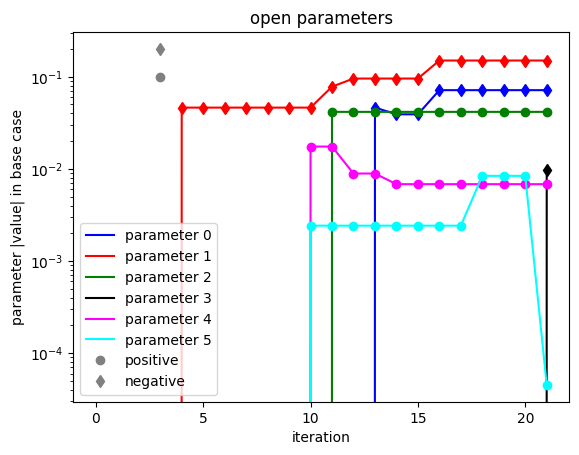

In [4]:
plot_par_iterations(allgrad5,base=True,startpar=19,stoppar=25,locy1=0.1,locy2=0.2)

The starting values are 0, and thus do not appear on this log scale. 

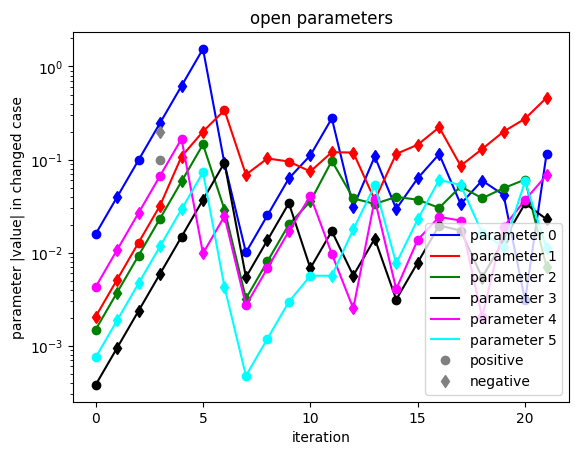

In [5]:
plot_par_iterations(allgrad5,base=False,startpar=19,stoppar=25,locy1=0.1,locy2=0.2)

Looks fine, at the beginning the increase is needed, since the first explored values are too small to cause a relevant change. Later it is mostly a random movement also in the sign. 

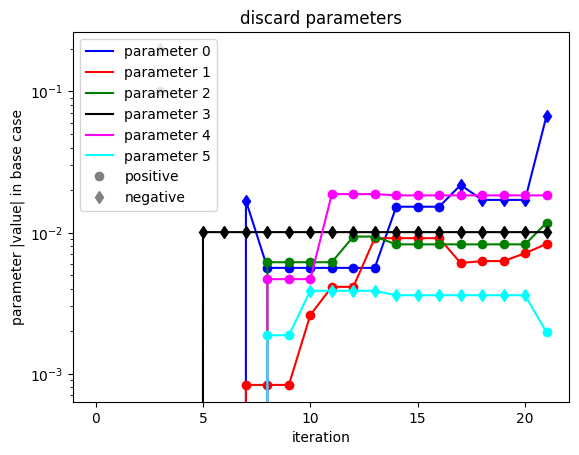

In [6]:
plot_par_iterations(allgrad5,base=True,startpar=25,stoppar=31,locy1=0.1,locy2=0.2)

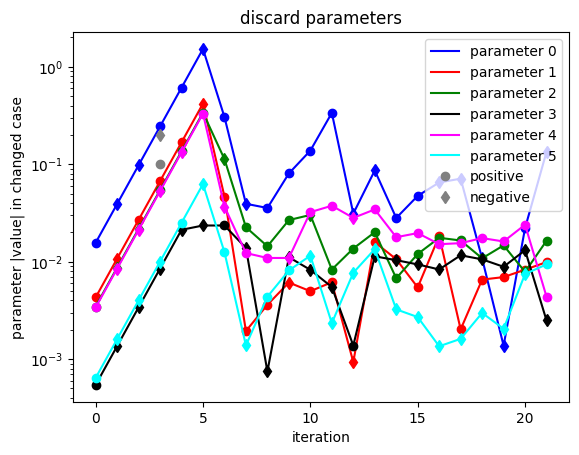

In [7]:
plot_par_iterations(allgrad5,base=False,startpar=25,stoppar=31,locy1=0.1,locy2=0.2)

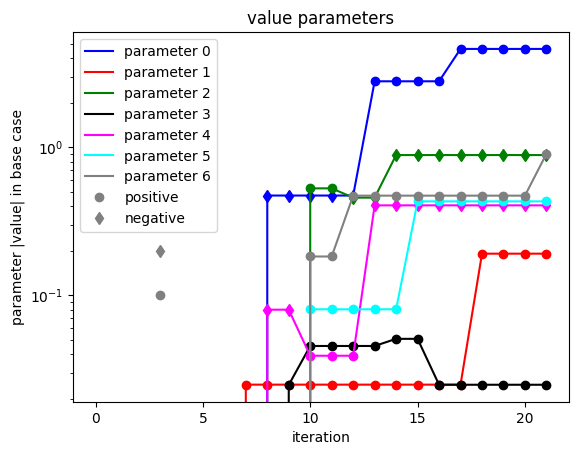

In [8]:
plot_par_iterations(allgrad5,base=True,startpar=31,stoppar=38,locy1=0.1,locy2=0.2)

As before the value parameters get larger than the others, which stop at about |0.1|. 5 of 7 parameters are positive. It is stil not clear whether that is correct or a problem of the code.

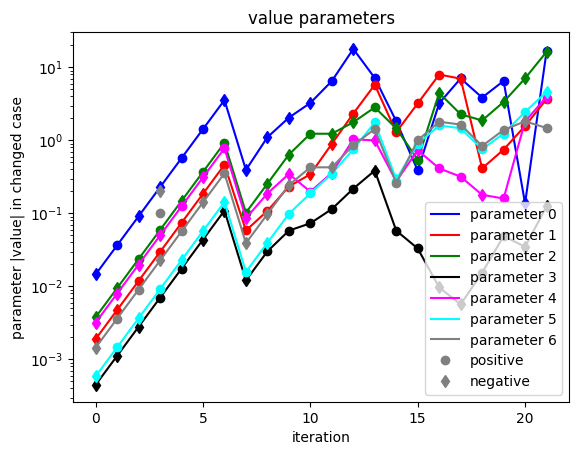

In [9]:
plot_par_iterations(allgrad5,base=False,startpar=31,stoppar=38,locy1=0.1,locy2=0.2)

The explored paramters are a little less extreme, the increase is not much after the iniial one. 

In [10]:
delta5=np.zeros((7,21))
for i in range(allgrad5.shape[3]-1):
    print(f"iteration {i+1} win_new={np.round(np.mean(allgrad5[40,0,:,i+1]),1)}  win_old={np.round(np.mean(allgrad5[40,0,:,i]),1)}")
    delta5[0,i]=(np.mean(allgrad5[40,0,:,i+1]))-(np.mean(allgrad5[40,0,:,i]))
    for j in range(19):
        if allgrad5[18+j,0,0,i+1]!=allgrad5[18+j,0,0,i]:
            err=100*np.sqrt(np.sum(allgrad5[38,j,:,i])/np.sum(allgrad5[38,j,:,i])**2+np.sum(allgrad5[38,0,:,i])/np.sum(allgrad5[38,0,:,i])**2)
            diff=np.mean(allgrad5[40,j,:,i])-np.mean(allgrad5[40,0,:,i])
            print(f"parameter {j} changed because diff/err={np.round(diff/err,2)} and win={np.mean(allgrad5[40,j,:,i])}%")
            if diff>0:
                delta5[1,i]+=1
                delta5[3,i]+=diff/err
                if diff/err>delta5[5,i]:
                    delta5[5,i]=diff/err
            if diff<0:
                delta5[2,i]+=1    
                delta5[4,i]+=diff/err
                if diff/err<delta5[5,i]:
                    delta5[6,i]=diff/err   

iteration 1 win_new=98.8  win_old=98.6
iteration 2 win_new=99.2  win_old=98.8
iteration 3 win_new=99.0  win_old=99.2
iteration 4 win_new=94.8  win_old=99.0
parameter 2 changed because diff/err=-1.04 and win=93.8%
iteration 5 win_new=81.5  win_old=94.8
parameter 10 changed because diff/err=-3.16 and win=79.0%
iteration 6 win_new=82.4  win_old=81.5
iteration 7 win_new=86.8  win_old=82.4
parameter 7 changed because diff/err=1.13 and win=88.0%
parameter 8 changed because diff/err=-3.71 and win=63.8%
parameter 14 changed because diff/err=-1.23 and win=76.2%
iteration 8 win_new=74.1  win_old=86.8
parameter 7 changed because diff/err=1.31 and win=93.4%
parameter 9 changed because diff/err=-5.49 and win=59.4%
parameter 11 changed because diff/err=-3.93 and win=67.2%
parameter 12 changed because diff/err=1.07 and win=92.2%
parameter 13 changed because diff/err=-1.25 and win=80.6%
parameter 17 changed because diff/err=-1.61 and win=78.8%
iteration 9 win_new=68.1  win_old=74.1
parameter 16 change

Now looking on not first trial. 

In [11]:
allgrad5base=np.load('gradient4_fit2_all.npy')
print(allgrad5base.shape)
for i in range(allgrad5base.shape[1]):
    print(f"iteration {int(allgrad5base[41,i,0]-1)} trial {int(allgrad5base[42,i,0]-1)} {np.mean(allgrad5base[40,i,:])}")

(44, 48, 5)
iteration 0 trial 0 98.6
iteration 1 trial 0 98.75
iteration 2 trial 0 99.25
iteration 3 trial 0 99.0
iteration 4 trial 0 94.8
iteration 5 trial 0 81.5
iteration 6 trial 0 82.35
iteration 7 trial 0 97.25
iteration 7 trial 1 97.25
iteration 7 trial 2 97.75
iteration 7 trial 3 97.65
iteration 7 trial 4 96.4
iteration 7 trial 5 93.85
iteration 7 trial 6 93.1
iteration 7 trial 7 89.5
iteration 7 trial 8 89.0
iteration 7 trial 9 86.85
iteration 8 trial 0 74.1
iteration 9 trial 0 68.1
iteration 10 trial 0 79.25
iteration 10 trial 1 67.1
iteration 11 trial 0 67.8
iteration 12 trial 0 51.0
iteration 13 trial 0 43.95
iteration 14 trial 0 65.4
iteration 14 trial 1 57.65
iteration 14 trial 2 55.5
iteration 14 trial 3 48.3
iteration 14 trial 4 47.7
iteration 14 trial 5 46.1
iteration 14 trial 6 45.5
iteration 14 trial 7 43.8
iteration 15 trial 0 48.35
iteration 16 trial 0 45.35
iteration 17 trial 0 77.1
iteration 17 trial 1 57.0
iteration 17 trial 2 46.25
iteration 17 trial 3 42.95
ite

It ran into maximum iteration for base case once. 

Text(0.5, 1.0, 'gradient fit 5')

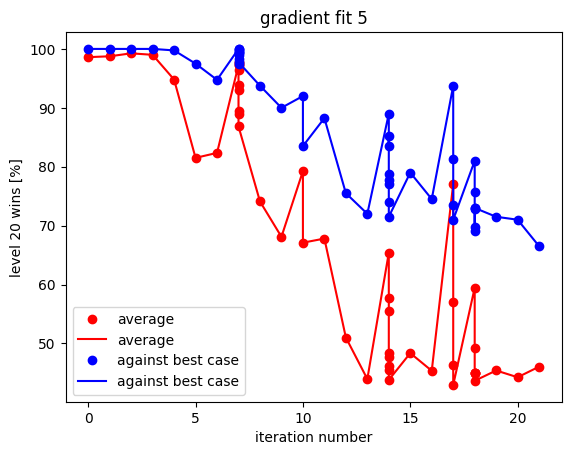

In [12]:
plt.plot(allgrad5base[41,:,0]-1,np.mean(allgrad5base[40,:,:],1),'o',color='red',label='average') 
plt.plot(allgrad5base[41,:,0]-1,np.mean(allgrad5base[40,:,:],1),color='red',label='average') 
plt.plot(allgrad5base[41,:,0]-1,(allgrad5base[40,:,0]),'o',color='blue',label='against best case') 
plt.plot(allgrad5base[41,:,0]-1,(allgrad5base[40,:,0]),color='blue',label='against best case') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("iteration number")
plt.ylabel("level 20 wins [%]")
plt.title("gradient fit 5")   

Against the current best case teh fit, is clearly less good than against the other cases. 
This is expected since that case is better. Now checking how good the other cases are gainst the usual used cases. 

Text(0.5, 1.0, 'gradient fit 5')

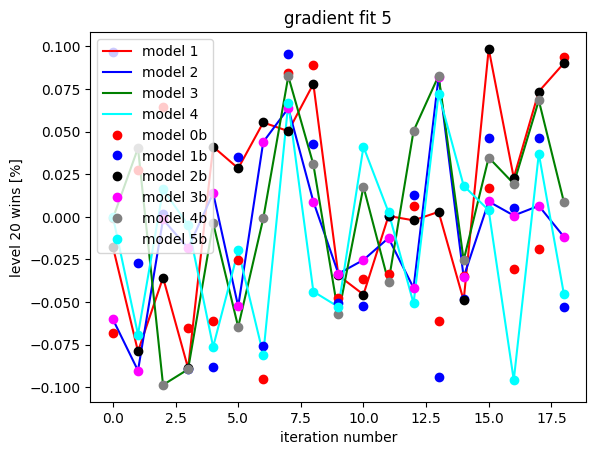

In [13]:
#the once used for the fit 

list_openx1=[]
list_discardx1=[]
list_valuex1=[]
allres2=np.load("mc_v9_all.npy")
c=0
list_open7=[]
list_discard7=[]
list_value7=[]
for i in range(850):
    if np.mean(allres2[40,i,4:6])<45 and np.max(allres2[40,i,:])<60:
        list_open7.append(allres2[19:38,i,0])
        list_discard7.append(allres2[25:31,i,0])        
        list_value7.append(allres2[31:38,i,0])   

#now it seem the same 

#start_time=time.time()
#boolean,bestres,allres=many_comparisons(list_open7,list_discard7,list_value7,list_openx1,list_discardx1,list_valuex1,50,wfrac=0.001,wfrac2=0.002)
#v10 on purpose impossible crieteria to just run all iterations with predictable operation duration
#mcx_v1_all.npy does first 20 
#v2 is 20 to 340 
#v3 is 340 tom 950
#np.save("mcx_v3_all.npy",allres)
plt.plot(range(19),allgrad5[0:19,0,1,0],color='red',label='model 1') 
plt.plot(range(19),allgrad5[0:19,0,2,0],color='blue',label='model 2') 
plt.plot(range(19),allgrad5[0:19,0,3,0],color='green',label='model 3') 
plt.plot(range(19),allgrad5[0:19,0,4,0],color='cyan',label='model 4') 
plt.plot(range(19),list_open7[0],'o',color='red',label='model 0b') 
plt.plot(range(19),list_open7[1],'o',color='blue',label='model 1b') 
plt.plot(range(19),list_open7[2],'o',color='black',label='model 2b') 
plt.plot(range(19),list_open7[3],'o',color='magenta',label='model 3b')
plt.plot(range(19),list_open7[4],'o',color='gray',label='model 4b') 
plt.plot(range(19),list_open7[5],'o',color='cyan',label='model 5b')
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("iteration number")
plt.ylabel("level 20 wins [%]")
plt.title("gradient fit 5")   

Looks good, are same as before, thus previous test wrong and not this one. (But still not clear whther that are the best models, but less important than other points like fit algorithm. 

Now building a function which fits a quadratic function to the data. The function is taken as argument as in logistic to ensure values between 0 and 1. For now assuming independence of the features.
That leads to 39 parameters. 

Defintion means that best (smallest win probablity) is at exponent equal infinity. Since that is difficult to use application should use reverse wins. 

In [15]:
x=np.zeros((19))
print(x)
a=0
b0=1
b1=0
b2=1
b3=0
b4=1
b5=0
b6=1
b7=0
b8=0
b9=1
b10=0
b10=1
b11=0
b12=1
b13=0
b14=1
b15=0
b16=1
b17=0
b18=0
c0=0
c1=1
c2=1
c3=1
c4=0
c5=0
c6=0
c7=0
c8=1
c9=1
c10=1
c10=0
c11=0
c12=1
c13=1
c14=0
c15=0
c16=0
c17=1
c18=1
d=0.7

res=quadratic_logistic(x,a,d,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18)
print(res)
xar=np.zeros((19,85))
for i in range(19):
    for j in range(85):
        xar[i,j]=random.random()/1-0.5
yar=quadratic_logistic(xar,a,d,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18)+random.random() / 100
print(yar)        

zar = np.empty(85)
zar.fill(0.01)
#input needs to 19 value per entry
fitres1,fitres2=curve_fit(quadratic_logistic, xar, yar,sigma=zar)
#values
print(fitres1.shape)
#covariance
print(fitres2.shape)
print(np.round(fitres1,3))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.35
[0.48413186 0.4932563  0.26025295 0.09094896 0.3643088  0.22748693
 0.37857368 0.13278877 0.34631426 0.15033075 0.46624503 0.27979959
 0.25372939 0.05399109 0.44292833 0.32633298 0.17086217 0.25605306
 0.32893781 0.33164573 0.24341346 0.37545494 0.25653591 0.22376705
 0.35026712 0.07166644 0.32256583 0.11414214 0.20945431 0.22343028
 0.23359416 0.23442346 0.2246193  0.30983624 0.21017818 0.24637535
 0.08515083 0.07456076 0.23597835 0.12790743 0.15685175 0.2151449
 0.19715315 0.14518059 0.15005136 0.26481837 0.17521579 0.15321375
 0.10287261 0.20046007 0.32990998 0.07038445 0.27540691 0.13971954
 0.19695934 0.14978912 0.05100858 0.11939102 0.15191442 0.13717736
 0.24932109 0.31127521 0.35086163 0.39597414 0.42215548 0.10185185
 0.38062249 0.08730114 0.23178859 0.37789289 0.06026258 0.36487317
 0.26978752 0.13523522 0.24710932 0.24426162 0.18071672 0.34035491
 0.12261759 0.2273596  0.17998716 0.09895643 0.50401013 0.18722463

Since the results should be either 0 or 1, the fitting seems to work with random input. 

In [16]:
#single inpt need to created elsehwere consisting of 19 parameters, win fraction, ndata
#is not really logistic regression is using that for fitting values
#max_iter parameter not use all data, -1 means using all data 
def quat_function(my_start,myPath,more_data=None,max_iter=-1):
    #load all data 
    list_grad=[f for f in os.listdir(myPath) 
        if (f.startswith(my_start) )]
    list_grad.sort()
    #if no second file with more data available 
    if more_data==None:
        #x, y and sigma arrays to be filled 
        xar=np.zeros((19,20*len(list_grad)))
        yar=np.zeros((20*len(list_grad)))
        sigma=np.zeros((20*len(list_grad)))
        c=0
        for i in range(len(list_grad)):
            dat=np.load(list_grad[i])
            xar[:,0+c:20+c]=dat[19:38,:,0]
            yar[0+c:20+c]=1-np.mean(dat[40,:,:],1)/100
            #error is square root of N data 
            sigma[0+c:20+c]=1/np.sqrt(np.sum(dat[38,:,:],1))
            c+=20
    else:
        #base values in it 
        more_base=np.load(more_data)
        c2=0
        for i in range(more_base.shape[1]):
            #do not consider these because they also in the other file 
            if more_base[42,i,0]>0:
                c2+=1
        #x, y and sigma arrays to be filled 
        xar=np.zeros((19,20*len(list_grad)+c2))
        yar=np.zeros((20*len(list_grad)+c2))
        sigma=np.zeros((20*len(list_grad)+c2))
        c=0
        #filling main
        for i in range(len(list_grad)):
            dat=np.load(list_grad[i])
            xar[:,0+c:20+c]=dat[19:38,:,0]
            yar[0+c:20+c]=1-np.mean(dat[40,:,:],1)/100
            #error is sqaure root of data 
            sigma[0+c:20+c]=1/np.sqrt(np.sum(dat[38,:,:],1))
            c+=20
        #filling others    
        for i in range(more_base.shape[1]):
            #do not consider these because they also in the other file 
            if more_base[42,i,0]>0:
                xar[:,c]=more_base[19:38,i,0]
                yar[c]=1-np.mean(more_base[40,i,:])/100
                #error is square root of N data 
                sigma[0+c:20+c]=1/np.sqrt(np.sum(more_base[38,i,:]))
                c+=1
    print(f"has {c} data points")             
    fitres1,fitres2=curve_fit(quadratic_logistic, xar, yar,sigma=sigma)
    #compare prediction with input
    applied=quadratic_logistic(xar,fitres1[0],fitres1[1],fitres1[2],fitres1[3],fitres1[4],fitres1[5],fitres1[6],fitres1[7],fitres1[8],fitres1[9],fitres1[10],fitres1[11],fitres1[12],fitres1[13],fitres1[14],fitres1[15],fitres1[16],fitres1[17],fitres1[18],fitres1[19],fitres1[20],fitres1[21],fitres1[22],fitres1[23],fitres1[24],fitres1[25],fitres1[26],fitres1[27],fitres1[28],fitres1[29],fitres1[30],fitres1[31],fitres1[32],fitres1[33],fitres1[34],fitres1[35],fitres1[36],fitres1[37],fitres1[38],fitres1[39])
    s=np.argmax(yar)
    print(f"maximum of input: {np.round(np.max(yar),4)}")
    print(f"maximum of solution in grid: {np.round(np.max(np.max(applied)),4)}")
    print(f"maximum of input at best solution {np.round(applied[s],4)}")    
    print(f"maximum of input-solution: {np.round(np.max(np.abs(yar-applied)),4)}")
    print(f"std of input-solution: {np.round(np.std(yar-applied),4)}")        
    return fitres1,fitres2
    
#wiuthout maximum parameter scatter is 0.049569890919795065   
#with it is 0.04780020253975106

In [17]:
quat_res1,quat_res2=quat_function('gradient4_fit2_it','/home/tobias/ml-testing/games/skyjo',more_data='gradient4_fit2_all.npy')
print(quat_res1[0:2])

has 488 data points
maximum of input: 0.63
maximum of solution in grid: 0.5471
maximum of input at best solution 0.5358
maximum of input-solution: 0.3418
std of input-solution: 0.0478
[9.49320633 0.54713271]


That are fit parameters next is getting where the minimum is. It is where the others are equal to minus a, that is more than location. 

In [18]:
print(quat_res1[0])

9.493206328521323


Since the  parameter is 9 it cannot be just be ignored. Is a problem. Could be solved with cross trems, but all would add many parameters (18+17+..=9\*18=162). Just 18 to have depedency? 

In [19]:
def quadratic_logistic_cross(x,a,d,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16,b17,b18,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,e12,e13,e14,e15,e16,e17):
    #needs all paarmeters seperatly for curvefit
    lin=x[0]*b0+x[1]*b1+x[2]*b2+x[3]*b3+x[4]*b4+x[5]*b5+x[6]*b6+x[7]*b7+x[8]*b8+x[9]*b9+x[10]*b10+x[11]*b11+x[12]*b12+x[13]*b13+x[14]*b14+x[15]*b15+x[16]*b16+x[17]*b17+x[18]*b18
    quat=x[0]**2*c0+x[1]**2*c1+x[2]**2*c2+x[3]**2*c3+x[4]**2*c4+x[5]**2*c5+x[6]**2*c6+x[7]**2*c7+x[8]**2*c8+x[9]**2*c9+x[10]**2*c10+x[11]**2*c11+x[12]**2*c12+x[13]**2*c13+x[14]**2*c14+x[15]**2*c15+x[16]**2*c16+x[17]**2*c17+x[18]**2*c18
    comb1=x[0]*x[1]*e0+x[0]*x[2]*e1+x[0]*x[3]*e2+x[0]*x[4]*e3+x[0]*x[5]*e4+x[0]*x[6]*e5+x[0]*x[7]*e6+x[0]*x[8]*e7+x[0]*x[9]*e8+x[0]*x[10]*e9+x[0]*x[11]*e10+x[0]*x[12]*e11+x[0]*x[13]*e12+x[0]*x[14]*e13+x[0]*x[15]*e14+x[0]*x[16]*e15+x[0]*x[17]*e16+x[0]*x[18]*e17
    return d/(1+np.exp(a+lin+quat+comb1))

In [20]:
#single inpt need to created elsehwere consisting of 19 parameters, win fraction, ndata
#is not really logistic regression is using that for fitting values
#max_iter parameter not use all data, -1 means using all data 
def quat_function_cross(my_start,myPath,more_data=None,max_iter=-1):
    #load all data 
    list_grad=[f for f in os.listdir(myPath) 
        if (f.startswith(my_start) )]
    list_grad.sort()
    #if no second file with more data available 
    if more_data==None:
        #x, y and sigma arrays to be filled 
        xar=np.zeros((19,20*len(list_grad)))
        yar=np.zeros((20*len(list_grad)))
        sigma=np.zeros((20*len(list_grad)))
        c=0
        for i in range(len(list_grad)):
            dat=np.load(list_grad[i])
            xar[:,0+c:20+c]=dat[19:38,:,0]
            yar[0+c:20+c]=1-np.mean(dat[40,:,:],1)/100
            #error is square root of N data 
            sigma[0+c:20+c]=1/np.sqrt(np.sum(dat[38,:,:],1))
            c+=20
    else:
        #base values in it 
        more_base=np.load(more_data)
        c2=0
        for i in range(more_base.shape[1]):
            #do not consider these because they also in the other file 
            if more_base[42,i,0]>0:
                c2+=1
        #x, y and sigma arrays to be filled 
        xar=np.zeros((19,20*len(list_grad)+c2))
        yar=np.zeros((20*len(list_grad)+c2))
        sigma=np.zeros((20*len(list_grad)+c2))
        c=0
        #filling main
        for i in range(len(list_grad)):
            dat=np.load(list_grad[i])
            xar[:,0+c:20+c]=dat[19:38,:,0]
            yar[0+c:20+c]=1-np.mean(dat[40,:,:],1)/100
            #error is sqaure root of data 
            sigma[0+c:20+c]=1/np.sqrt(np.sum(dat[38,:,:],1))
            c+=20
        #filling others    
        for i in range(more_base.shape[1]):
            #do not consider these because they also in the other file 
            if more_base[42,i,0]>0:
                xar[:,c]=more_base[19:38,i,0]
                yar[c]=1-np.mean(more_base[40,i,:])/100
                #error is square root of N data 
                sigma[0+c:20+c]=1/np.sqrt(np.sum(more_base[38,i,:]))
                c+=1
    print(f"has {c} data points")             
    fitres1,fitres2=curve_fit(quadratic_logistic_cross, xar, yar,sigma=sigma)
    #compare prediction with input
    applied=quadratic_logistic_cross(xar,fitres1[0],fitres1[1],fitres1[2],fitres1[3],fitres1[4],fitres1[5],fitres1[6],fitres1[7],fitres1[8],fitres1[9],fitres1[10],fitres1[11],fitres1[12],fitres1[13],fitres1[14],fitres1[15],fitres1[16],fitres1[17],fitres1[18],fitres1[19],fitres1[20],fitres1[21],fitres1[22],fitres1[23],fitres1[24],fitres1[25],fitres1[26],fitres1[27],fitres1[28],fitres1[29],fitres1[30],fitres1[31],fitres1[32],fitres1[33],fitres1[34],fitres1[35],fitres1[36],fitres1[37],fitres1[38],fitres1[39],fitres1[40],fitres1[41],fitres1[42],fitres1[43],fitres1[44],fitres1[45],fitres1[46],fitres1[47],fitres1[48],fitres1[49],fitres1[50],fitres1[51],fitres1[52],fitres1[53],fitres1[54],fitres1[55],fitres1[56],fitres1[57])
    s=np.argmax(yar)
    print(f"maximum of input: {np.round(np.max(yar),4)}")
    print(f"maximum of solution in grid: {np.round(np.max(np.max(applied)),4)}")
    print(f"maximum of input at best solution {np.round(applied[s],4)}")    
    print(f"maximum of input-solution: {np.round(np.max(np.abs(yar-applied)),4)}")
    print(f"std of input-solution: {np.round(np.std(yar-applied),4)}")        
    return fitres1,fitres2
    
#now with cross term to 0 the scatter is 0.0528 worse 

In [21]:
quat_res1c,quat_res2c=quat_function_cross('gradient4_fit2_it','/home/tobias/ml-testing/games/skyjo',more_data='gradient4_fit2_all.npy')
print(quat_res1c[0:2])

has 488 data points


/tmp/ipykernel_10298/2817808929.py:6: RuntimeWarning: overflow encountered in exp
  return d/(1+np.exp(a+lin+quat+comb1))


maximum of input: 0.63
maximum of solution in grid: 0.5516
maximum of input at best solution 0.5511
maximum of input-solution: 0.584
std of input-solution: 0.0528
[4.35061549 0.55158135]


Compaing win fractions and point differential to see whther point differential is a predictor which saves time.  

In [126]:
myPath='/home/tobias/ml-testing/games/skyjo'
list_fit1=[f for f in os.listdir(myPath) 
    if (f.startswith('test_score01') )]
list_fit1.sort()
list_fit2=[f for f in os.listdir(myPath) 
    if (f.startswith('test_score02') )]
list_fit2.sort()
list_fit3=[f for f in os.listdir(myPath) 
    if (f.startswith('test_score03') )]
list_fit3.sort()
list_fit4=[f for f in os.listdir(myPath) 
    if (f.startswith('test_score04') )]
list_fit4.sort()

list_fitb1=[f for f in os.listdir(myPath) 
    if (f.startswith('test_scoreb01') )]
list_fitb1.sort()


list_fitb2=[f for f in os.listdir(myPath) 
    if (f.startswith('test_scoreb02') )]
list_fitb2.sort()

cube=np.zeros((42,6,200,10))
for i in range(10):
    a=np.load(list_fit1[i])
    b=np.load(list_fit2[i])
    c=np.load(list_fit3[i])
    d=np.load(list_fit4[i])
    cube[:,:,0:25,i]=a
    cube[:,:,25:50,i]=b
    cube[:,:,50:75,i]=c  
    cube[:,:,75:200,i]=d  
    

cube2=np.zeros((42,6,400,10))
for i in range(10):
    a=np.load(list_fitb1[i])
    b=np.load(list_fitb2[i])

    cube2[:,:,0:25,i]=a
    cube2[:,:,25:400,i]=b
    
    
av=np.zeros((5,6,200))
for i in range(200):
    for j in range(6):
        av[0,j,i]=np.sum(cube[38,j,i,:])
        av[1,j,i]=np.sum(cube[39,j,i,:])     
        av[2,j,i]=np.sum(cube[41,j,i,:]*cube[38,j,i,:])  
        av[3,j,i]=av[1,j,i]/av[0,j,i]
        av[4,j,i]=av[2,j,i]/av[0,j,i]     
        
    
    
av2=np.zeros((5,6,400))
for i in range(400):
    for j in range(6):
        av2[0,j,i]=np.sum(cube2[38,j,i,:])
        av2[1,j,i]=np.sum(cube2[39,j,i,:])     
        av2[2,j,i]=np.sum(cube2[41,j,i,:]*cube2[38,j,i,:])  
        av2[3,j,i]=av2[1,j,i]/av2[0,j,i]
        av2[4,j,i]=av2[2,j,i]/av2[0,j,i]         
        
        
av0=np.zeros((5,6,200))
av9=np.zeros((5,6,200))
for i in range(200):
    for j in range(6):
        av0[0,j,i]=np.sum(cube[38,j,i,0])
        av0[1,j,i]=np.sum(cube[39,j,i,0])     
        av0[2,j,i]=np.sum(cube[41,j,i,0]*cube[38,j,i,0])  
        av0[3,j,i]=av0[1,j,i]/av0[0,j,i]
        av0[4,j,i]=av0[2,j,i]/av0[0,j,i]     
        av9[0,j,i]=np.sum(cube[38,j,i,1:10])
        av9[1,j,i]=np.sum(cube[39,j,i,1:10])     
        av9[2,j,i]=np.sum(cube[41,j,i,1:10]*cube[38,j,i,1:10])  
        av9[3,j,i]=av9[1,j,i]/av9[0,j,i]
        av9[4,j,i]=av9[2,j,i]/av9[0,j,i]            
    
    
av20=np.zeros((5,6,400))
av29=np.zeros((5,6,400))
for i in range(400):
    for j in range(6):
        av20[0,j,i]=np.sum(cube2[38,j,i,0])
        av20[1,j,i]=np.sum(cube2[39,j,i,0])     
        av20[2,j,i]=np.sum(cube2[41,j,i,0]*cube2[38,j,i,0])  
        av20[3,j,i]=av20[1,j,i]/av20[0,j,i]
        av20[4,j,i]=av20[2,j,i]/av20[0,j,i]   
        av29[0,j,i]=np.sum(cube2[38,j,i,1:10])
        av29[1,j,i]=np.sum(cube2[39,j,i,1:10])     
        av29[2,j,i]=np.sum(cube2[41,j,i,1:10]*cube2[38,j,i,0])  
        av29[3,j,i]=av29[1,j,i]/av29[0,j,i]
        av29[4,j,i]=av29[2,j,i]/av29[0,j,i]         

Text(0, 0.5, 'level 20 wins [%]')

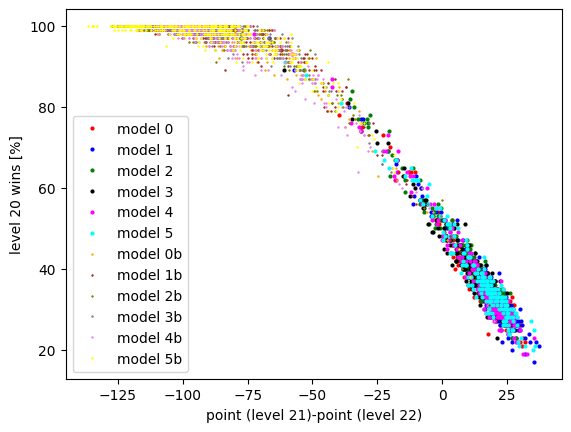

In [30]:
plt.plot(av[4,0,:],100*av[3,0,:],'o',ms=2,color='red',label='model 0') 
plt.plot(av[4,1,:],100*av[3,1,:],'o',ms=2,color='blue',label='model 1') 
plt.plot(av[4,2,:],100*av[3,2,:],'o',ms=2,color='green',label='model 2') 
plt.plot(av[4,3,:],100*av[3,3,:],'o',ms=2,color='black',label='model 3')
plt.plot(av[4,4,:],100*av[3,4,:],'o',ms=2,color='magenta',label='model 4') 
plt.plot(av[4,5,:],100*av[3,5,:],'o',ms=2,color='cyan',label='model 5') 
plt.plot(av2[4,0,:],100*av2[3,0,:],'+',ms=1,color='orange',label='model 0b') 
plt.plot(av2[4,1,:],100*av2[3,1,:],'+',ms=1,color='brown',label='model 1b') 
plt.plot(av2[4,2,:],100*av2[3,2,:],'+',ms=1,color='olive',label='model 2b') 
plt.plot(av2[4,3,:],100*av2[3,3,:],'+',ms=1,color='gray',label='model 3b')
plt.plot(av2[4,4,:],100*av2[3,4,:],'+',ms=1,color='violet',label='model 4b') 
plt.plot(av2[4,5,:],100*av2[3,5,:],'+',ms=1,color='yellow',label='model 5b') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("point (level 21)-point (level 22)")
plt.ylabel("level 20 wins [%]")
#plt.title("gradient fit 5") 

Function need to be symmetric by definition. Thus, no below 20% needed, just enough at high needed. 
Looks like there could be some offset between models, but even if they exist it could be still better to do it speedwise, with some confirmation at the end. 
Logistic should be tried first, because 7 is limited at 0 and 1 and it needs to be 0.5 at 50%. 

Maybe a single parameter? 

In [38]:
def sym_logistic(x,a):
    return 1/(1+np.exp(a*x))

In [115]:
def sym_logistic3(x,a,b):
    return 1./(1.+1*np.exp(a*x+b*x**3))

In [116]:
print(sym_logistic(-1,6))
print(sym_logistic(1,6))
#is not symmetric 
print(sym_logistic3(0.1,6,0.1))
print(sym_logistic3(-0.1,6,0.1))

0.9975273768433653
0.0024726231566347743
0.3543208156834117
0.6456791843165882


In [87]:
fitresb=np.zeros((8,1000))
fitresc=np.zeros((8,1000))
for i in range(6):
    print(i)
    fitres1b,fitres2b=curve_fit(sym_logistic, av[4,i,:],av[3,i,:])

    print(fitres1b)
    fitres1c,fitres2c=curve_fit(sym_logistic, av2[4,i,:],av2[3,i,:])
    print(fitres1c)  
    for j in range(fitresb.shape[1]):
        fitresb[0,j]=-150+j/3.33
        fitresb[1+i,j]=sym_logistic(fitresb[0,j],fitres1b[0])
        fitresc[0,j]=-150+j/3.33
        fitresc[1+i,j]=sym_logistic(fitresc[0,j],fitres1c[0])        

0
[0.03690501]
[0.04216398]
1
[0.03645943]
[0.04350185]
2
[0.03614057]
[0.04483542]
3
[0.03695027]
[0.04374404]
4
[0.03809946]
[0.04042429]
5
[0.0358542]
[0.04331468]


/tmp/ipykernel_10298/41918393.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(a*x))


In [117]:
fitresb3=np.zeros((8,1000))
fitresc3=np.zeros((8,1000))
for i in range(6):
    print(i)
    fitres1b,fitres2b=curve_fit(sym_logistic3, av[4,i,:],av[3,i,:])

    print(fitres1b)
    fitres1c,fitres2c=curve_fit(sym_logistic3, av2[4,i,:],av2[3,i,:])
    print(fitres1c)  
    for j in range(fitresb.shape[1]):
        fitresb3[0,j]=-150+j/3.33
        fitresb3[1+i,j]=sym_logistic3(fitresb[0,j],fitres1b[0],fitres1b[1])
        fitresc[0,j]=-150+j/3.33
        fitresc3[1+i,j]=sym_logistic3(fitresc[0,j],fitres1c[0],fitres1c[1])  

0
[3.65955388e-02 5.52382073e-07]
[-1.04351168  0.35065285]
1
[3.52087459e-02 2.04469573e-06]
[1. 1.]
2
[3.39166588e-02 4.74607686e-06]
[1.62904781 1.        ]
3
[3.65249136e-02 9.34889273e-07]
[0.17176924 1.        ]
4
[3.70320533e-02 1.89074050e-06]
[1. 1.]
5
[3.55360203e-02 5.53783438e-07]
[1. 1.]


/tmp/ipykernel_10298/4066596726.py:2: RuntimeWarning: overflow encountered in exp
  return 1./(1.+1*np.exp(a*x+b*x**3))


Similar coeeficent, bigger difference between differnt model sets. Could be effect of quantization. 

[0.0397579]
[3.54172883e-02 1.67547918e-06]


/tmp/ipykernel_10298/4066596726.py:2: RuntimeWarning: overflow encountered in exp
  return 1./(1.+1*np.exp(a*x+b*x**3))


(80.0, 100.0)

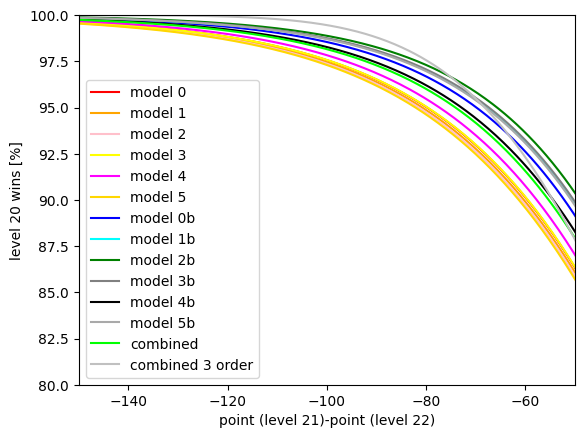

In [127]:
comb=np.zeros((2,6*160+6*320))
for i in range(6):
    comb[0,i*160:(i+1)*160]=av[4,i,0:160]
    comb[1,i*160:(i+1)*160]=av[3,i,0:160]
    comb[0,6*160+i*320:6*160+(i+1)*320]=av2[4,i,0:320]
    comb[1,6*160+i*320:6*160+(i+1)*320]=av2[3,i,0:320]
comba=np.zeros((2,6*40+6*80))
for i in range(6):
    comba[0,i*40:(i+1)*40]=av[4,i,160:200]
    comba[1,i*40:(i+1)*40]=av[3,i,160:200]
    comba[0,6*40+i*80:6*40+(i+1)*80]=av2[4,i,320:400]
    comba[1,6*40+i*80:6*40+(i+1)*80]=av2[3,i,320:400]    
comba0=np.zeros((2,6*40+6*80))
for i in range(6):
    comba0[0,i*40:(i+1)*40]=av0[4,i,160:200]
    comba0[1,i*40:(i+1)*40]=av0[3,i,160:200]
    comba0[0,6*40+i*80:6*40+(i+1)*80]=av20[4,i,320:400]
    comba0[1,6*40+i*80:6*40+(i+1)*80]=av20[3,i,320:400]    
comba9=np.zeros((2,6*40+6*80))
for i in range(6):
    comba9[0,i*40:(i+1)*40]=av9[4,i,160:200]
    comba9[1,i*40:(i+1)*40]=av9[3,i,160:200]
    comba9[0,6*40+i*80:6*40+(i+1)*80]=av29[4,i,320:400]
    comba9[1,6*40+i*80:6*40+(i+1)*80]=av29[3,i,320:400]        
fitresalla,fitresallb=curve_fit(sym_logistic, comb[0,:],comb[1,:])
print(fitresalla)
fitresalla3,fitresallb=curve_fit(sym_logistic3, comb[0,:],comb[1,:])
print(fitresalla3)
for i in range(1000):
    fitresb[7,i]=sym_logistic(fitresb[0,i],fitresalla[0])
    fitresc[7,i]=sym_logistic3(fitresb[0,i],fitresalla3[0],fitresalla3[1])
    
plt.plot(fitresb[0],100*fitresb[1],ms=2,color='red',label='model 0') 
plt.plot(fitresb[0],100*fitresb[2],ms=2,color='orange',label='model 1') 
plt.plot(fitresb[0],100*fitresb[3],ms=2,color='pink',label='model 2') 
plt.plot(fitresb[0],100*fitresb[4],ms=2,color='yellow',label='model 3')
plt.plot(fitresb[0],100*fitresb[5],ms=2,color='magenta',label='model 4') 
plt.plot(fitresb[0],100*fitresb[6],ms=2,color='gold',label='model 5') 
plt.plot(fitresc[0],100*fitresc[1],ms=1,color='blue',label='model 0b') 
plt.plot(fitresc[0],100*fitresc[2],ms=1,color='cyan',label='model 1b') 
plt.plot(fitresc[0],100*fitresc[3],ms=1,color='green',label='model 2b') 
plt.plot(fitresc[0],100*fitresc[4],ms=1,color='gray',label='model 3b')
plt.plot(fitresc[0],100*fitresc[5],ms=1,color='black',label='model 4b') 
plt.plot(fitresc[0],100*fitresc[6],ms=1,color='darkgray',label='model 5b') 
plt.plot(fitresc[0],100*fitresb[7],ms=3,color='lime',label='combined') 
plt.plot(fitresc[0],100*fitresc[7],ms=3,color='silver',label='combined 3 order') 
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("point (level 21)-point (level 22)")
plt.ylabel("level 20 wins [%]")
plt.xlim(-150,-50)
plt.ylim(80,100)
#plt.title("gradient fit 5") 

The first 6 bend earlier. Since there is not much data for there, it is likely spurious at least for that region. Either effect of low number fit or logistic is really not the best function. Now looking on just with their data.

(50.0, 100.0)

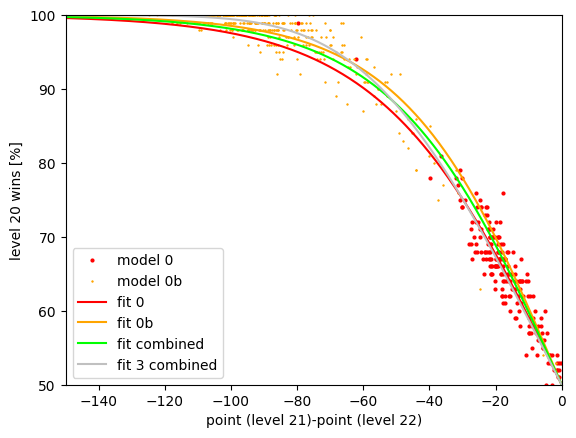

In [120]:
plt.plot(av[4,0,:],100*av[3,0,:],'o',ms=2,color='red',label='model 0') 
plt.plot(av2[4,0,:],100*av2[3,0,:],'+',ms=1,color='orange',label='model 0b') 
#mirroing that plot is smaller
plt.plot(-av[4,0,:],100-100*av[3,0,:],'o',ms=2,color='red') 
plt.plot(-av2[4,0,:],100-100*av2[3,0,:],'+',ms=1,color='orange') 
plt.plot(fitresb[0],100*fitresb[1],ms=2,color='red',label='fit 0') 
plt.plot(fitresc[0],100*fitresc[1],ms=1,color='orange',label='fit 0b') 
plt.plot(fitresb[0],100*fitresb[7],ms=2,color='lime',label='fit combined') 
plt.plot(fitresb[0],100*fitresc[7],ms=2,color='silver',label='fit 3 combined')
plt.legend(loc="best")
#plt.xscale("log")
plt.xlabel("point (level 21)-point (level 22)")
plt.ylabel("level 20 wins [%]")
plt.xlim(-150,0)
plt.ylim(50,100)
#plt.title("gradient fit 5") 

Nowe using 3 order model and a tenth to predict rest. 

In [146]:
print(f"mean 1 direct win minus 9 {np.round(100*np.mean(comba0[1]-comba9[1]),2)} %")
print(f"standard deviation 1 direct win minus 9 {np.round(100*np.std(comba0[1]-comba9[1]),2)} %")
predlin=sym_logistic(comba0[0],fitresalla[0])
print(f"mean 1 linear minus 9 {np.round(100*np.mean(predlin-comba9[1]),2)} %")
print(f"standard deviation 1 linear minus 9 {np.round(100*np.std(predlin-comba9[1]),2)} %")
predcub=sym_logistic3(comba0[0],fitresalla3[0],fitresalla3[1])
print(f"mean 1 cube minus 9 {np.round(100*np.mean(predcub-comba9[1]),2)} %")
print(f"standard deviation 1 cube minus 9 {np.round(100*np.std(predcub-comba9[1]),2)} %")
print("assuming quadratic")
print(f" {np.round((np.std(predcub-comba9[1])/np.std(comba0[1]-comba9[1]))**2,3)} times works as well")

mean 1 direct win minus 9 0.37 %
standard deviation 1 direct win minus 9 10.27 %
mean 1 linear minus 9 -0.55 %
standard deviation 1 linear minus 9 8.65 %
mean 1 cube minus 9 0.34 %
standard deviation 1 cube minus 9 8.35 %
assuming quadratic
 0.661 times works as well


The prediction from points is better, but not by a lot, just a gain of 34%, not clear whether worth to implement.